In [3]:
from __future__ import print_function
%matplotlib inline
import os 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use("ggplot")

from skimage import io
from sklearn.cluster import KMeans

#drop pdown list
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets



In [5]:
plt.rcParams['figure.figsize'] =(20,12)

# Data Preprocessing

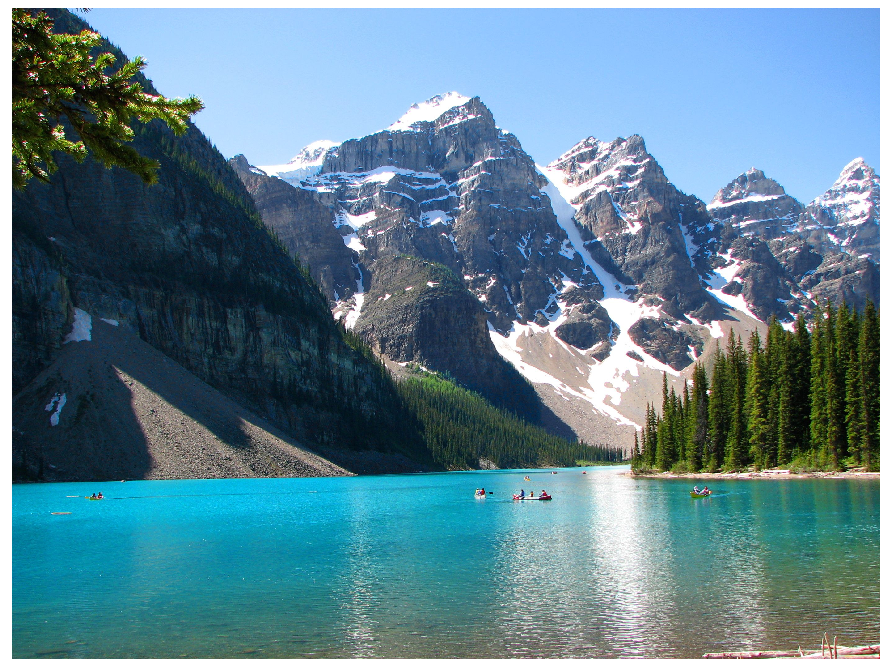

In [9]:
img = io.imread('Pictures/1.jpg')
ax = plt.axes(xticks =[], yticks=[])
ax.imshow(img)

In [10]:
img.shape
#3:color
#image size

(2112, 2816, 3)

In [11]:
#normalize
img_data = (img / 255.0).reshape(-1, 3)
img_data.shape

(5947392, 3)

# Visualizing the Color Space using Point Clouds

In [12]:
from plot_utils import plot_utils

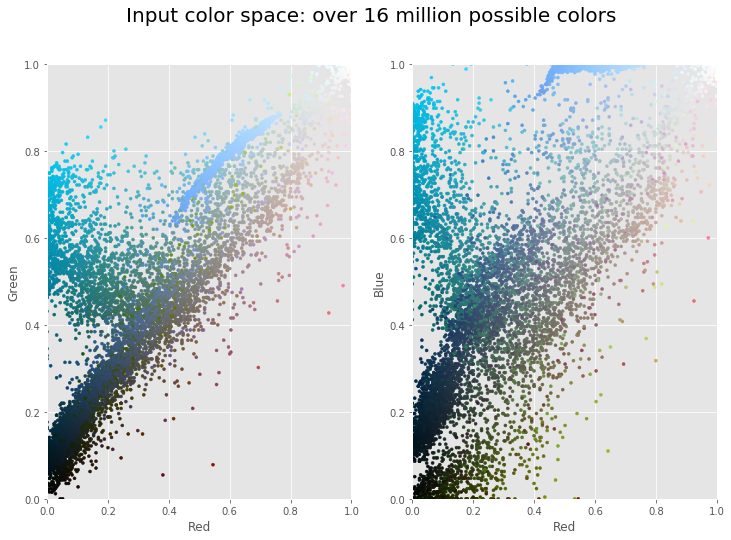

In [15]:
x = plot_utils(img_data, title="Input color space: over 16 million possible colors")
x.colorSpace()

# Visualizing the K-means Reduced Color space

In [19]:
#from 16m to 16!
from sklearn.cluster import MiniBatchKMeans

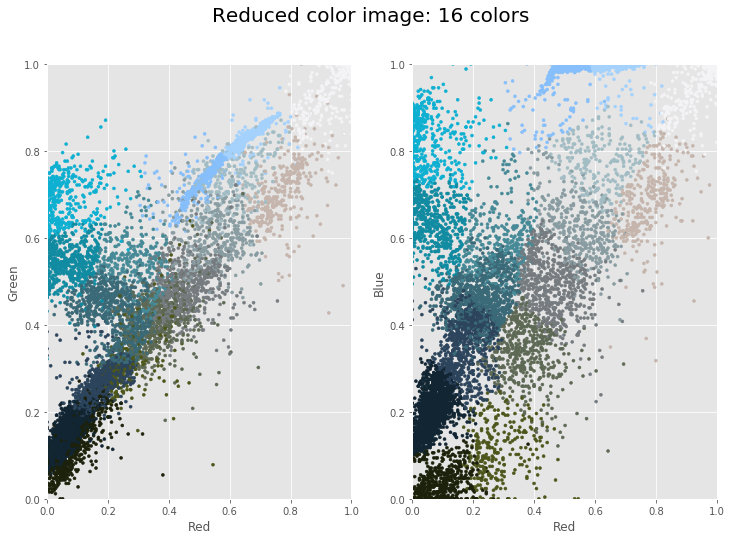

In [20]:
kmeans = MiniBatchKMeans(16).fit(img_data)
k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]

y = plot_utils(img_data, colors=k_colors, title="Reduced color image: 16 colors")
y.colorSpace()

# K-means Image Compression with Intractive controls

In [21]:
img_dir = 'Pictures/'

In [29]:
@interact
def color_compression(image=os.listdir(img_dir), k=IntSlider(min=1,max=256,step=1, value=16,
                                                            continuous_update=False,
                                                            layout=dict(width='100%'))):
    
    input_img = io.imread(img_dir+image)
    img_data = (input_img / 255.0).reshape(-1,3)
    
    kmeans = MiniBatchKMeans(k).fit(img_data)
    k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]
    
    k_img = np.reshape(k_colors, (input_img.shape))
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.suptitle('K-means Image Compression', fontsize=20)
    
    ax1.set_title('Compression')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(k_img)
    
    
    ax2.set_title('Original (16,677,777 colors)')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(input_img)
    
    plt.subplots_adjust(top=0.85)
    plt.show()

interactive(children=(Dropdown(description='image', options=('1.jpg', '2.jpg', 'Camera Roll', 'Capture.PNG', '…